In [1]:
!python3 -m pip install scikit-learn
!python3 -m pip install seaborn

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
from attrs import define
from abc import ABC, abstractmethod
from math import sqrt, atan2, hypot, sin, cos, pi, log
from typing import Optional, Tuple, List
from scipy.interpolate import griddata
from peak_detection import NausWallenstein
from tree_clustering import TreeClustering

In [3]:
from test_generator import Line, generate_image, apply_general_noise
from polarization import\
    MaxComponentInertionPolarization,\
    InertionPolarization
from cell import Cell
from line_utils import abc2natural, natural2abc, draw_r_phi, draw_abc
from segmentation import grid_from_image, segments_detection, loop_segment_list
from peak_detection import NausWallenstein
from experiment import ExperimentData, run_exp

In [4]:
img = cv.imread("../test-images/thumb003.jpg", 0)
edges = cv.Canny(img, 30, 200)
img

array([[127, 131, 130, ..., 160, 157, 154],
       [148, 150, 149, ..., 174, 171, 170],
       [173, 171, 171, ..., 189, 187, 187],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

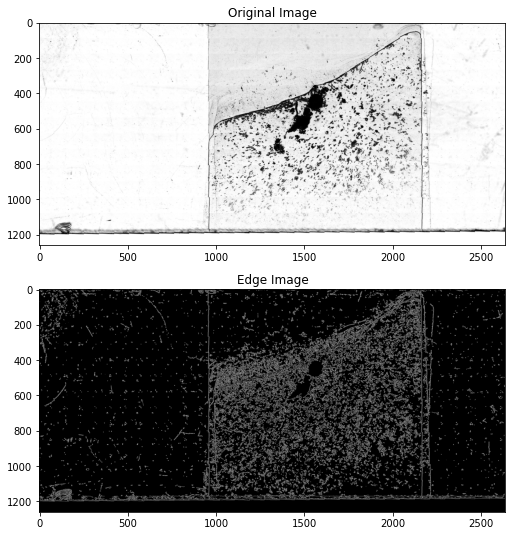

In [5]:
plt.figure(figsize=(15, 9))
plt.subplot(211)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')

plt.subplot(212)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.show()

bounding box size:  (2543.1701294706468, 6.686567084519372)
k0 = 0.01915834823974376
1.0


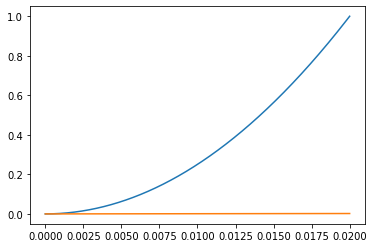

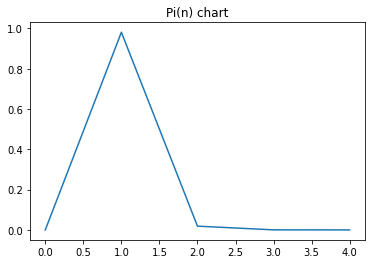

cluster size limit:  100 ; probability for small clusters 0.9999999003839539
size:  2 clusters_amount:  8
parameters for ppf:  prob =  0.9999999874999994 quantile = 1.2500000590165428e-08 ; mean = 0.01333288539956242 ; variance = 2.2239575044774536e-05
quantile: -0.012950022558238898
size:  3 clusters_amount:  1
parameters for ppf:  prob =  0.9999999 quantile = 9.999999994736442e-08 ; mean = 0.02666577079912484 ; variance = 4.447915008954907e-05
quantile: -0.008010010585883506
size:  4 clusters_amount:  1
parameters for ppf:  prob =  0.9999999 quantile = 9.999999994736442e-08 ; mean = 0.03999865619868726 ; variance = 6.67187251343236e-05
quantile: -0.0024703292140976496
size:  5 clusters_amount:  1
parameters for ppf:  prob =  0.9999999 quantile = 9.999999994736442e-08 ; mean = 0.05333154159824968 ; variance = 8.895830017909814e-05
quantile: 0.004292581277686371
size:  6 clusters_amount:  1
parameters for ppf:  prob =  0.9999999 quantile = 9.999999994736442e-08 ; mean = 0.0666644269978

/home/derrior/HSE/Diploma/noisy-line/src/line_utils.py:47: UserWarning: No contour levels were found within the data range.
  plt.contour(X, Y, F, [0], alpha=max(1, intensity), **default_parameters)


axes limits for scatter plots [-0.8, 38.8] [-0.009669794850834648, 0.2030656918675276]


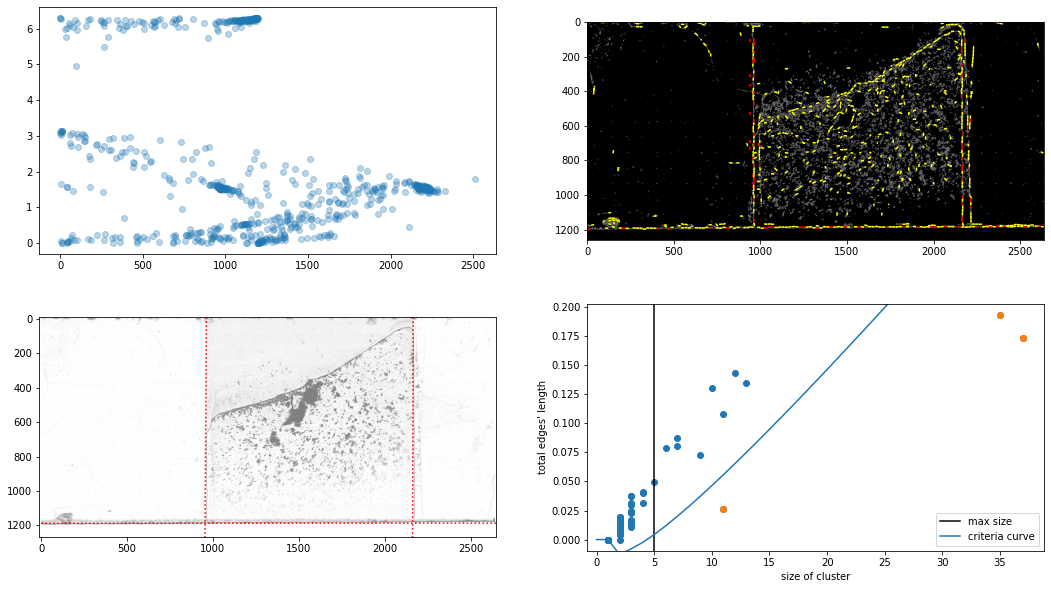

37 0.17381053746018438 [(959.0, 1.5707963267948966), (960.0, 1.5707963267948966), (959.0, 1.5707963267948966), (959.0, 1.5707963267948966), (959.0, 1.5707963267948966), (959.0, 1.5707963267948966), (959.0, 1.5707963267948966), (959.0, 1.5707963267948966), (959.0, 1.5707963267948966), (958.5384615384615, 1.5707963267948966), (961.0, 1.5707963267948966), (960.0, 1.5707963267948966), (960.0, 1.5707963267948966), (960.0, 1.5707963267948966), (960.0, 1.5707963267948966), (957.0, 1.5707963267948966), (962.0, 1.5707963267948966), (961.0, 1.5707963267948966), (961.0, 1.5707963267948966), (957.0, 1.5707963267948966), (954.4976996106518, 1.5837396631137366), (962.5254873979814, 1.567440404356699), (951.3275869269918, 1.5835937724791334), (962.7902740256686, 1.5656636568497515), (952.5509605629047, 1.592527476265054), (946.1407104271088, 1.5910331119666283), (964.4786348914556, 1.568532020438463), (966.2780114884528, 1.5564940772098144), (966.7019210179719, 1.552710129908408), (971.1066088248039,

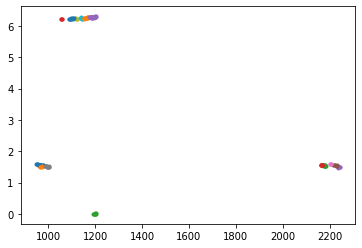

{(961.8250380529655, 1.5645111853649458): -14.14535009256201, (2165.7688010740644, 1.5677792651810534): -9.42915707337523, (1188.6286381121322, 6.283579184831438): -12.11604289189604}
axes limits for scatter plots [-0.8, 38.8] [-0.009669794850834648, 0.2030656918675276]


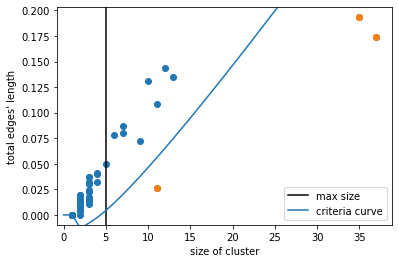

In [6]:
clustering = TreeClustering(alpha=0.00001, rescale=sum(img.shape) / (4 * pi), cutting_dist=0.02)

exp_data = run_exp(img, grid_size=20,# overlapping_step=5,
                   polarization_method=MaxComponentInertionPolarization(10, 10),
                   peak_detection_method=clustering, lines_count=10)
                  # peak_detection_method=NausWallenstein(alpha=0.001, r_window=20, phi_window=0.05))
exp_data.visualize(compact=True)

for i in clustering.components:
    if i.size > 3:
        print(i.size, i.tree_length, i.points)
        i.show()
plt.show()
print(clustering.result)

clustering.visualize_clusters()

In [7]:
sum(img.shape) / (2 * pi)

620.2268132291161

axes limits for scatter plots [-0.8, 38.8] [-0.009669794850834648, 0.2030656918675276]


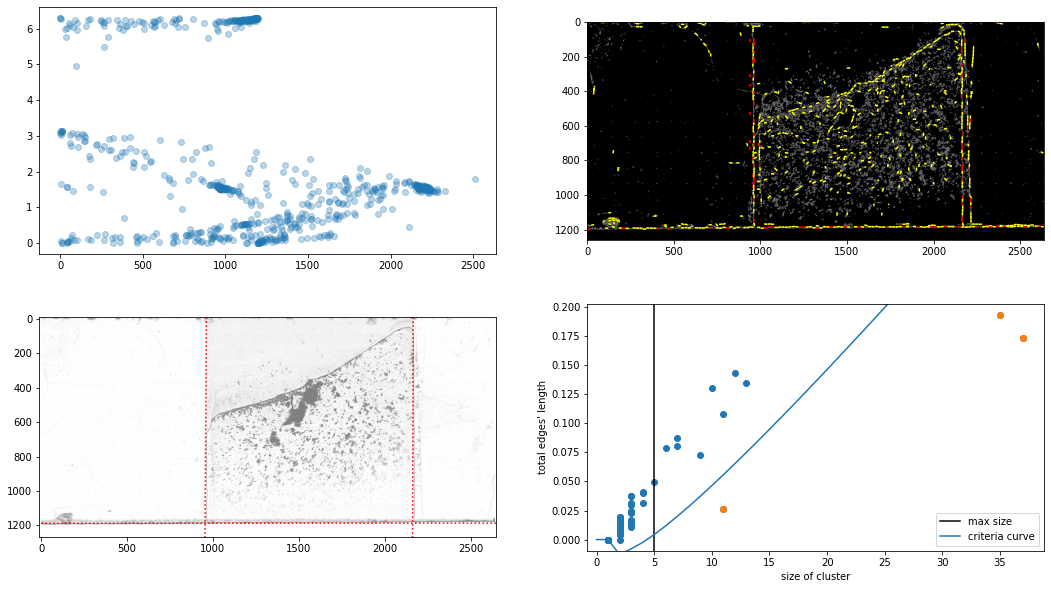

In [8]:
exp_data.visualize(compact=True)

In [9]:
print(len(clustering.point_list))

836


In [10]:
list(filter(lambda x: x[0] > 6.22, exp_data.windows.items()))

[]

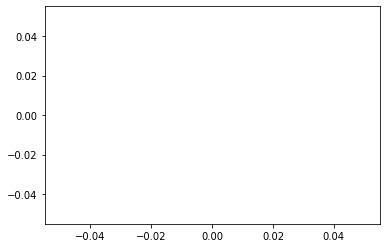

In [11]:
    from math import log
    x, y, z = [], [], []

    for k, v in exp_data.windows.items():
        x.append(k)
        y.append(v[0])
        z.append(-log(v[1]))
    plt.plot(x, y)
    #plt.plot(x, z)

In [12]:
print(len(list(filter(lambda x: abs(x[1]) < 0.03, lst))))

NameError: name 'lst' is not defined

In [ ]:
method = NausWallenstein(alpha=0.1)
peaks, windows = method.detect_peaks(lst, 5)

In [ ]:
window_list = list(windows.items())
window_list.sort(key=lambda x: x[0])
x, y = [], []
for i in window_list:
    x.append(i[0])
    y.append(i[1][0])
plt.plot(x, y)
print(*sorted(window_list, key=lambda x: x[1][0])[-40:])

In [ ]:
run_exp(img,
        10,
        compact=False,
        polarization_method=MaxComponentInertionPolarization(),
        peak_detection_method=NausWallenstein(alpha=1))

In [ ]:
current_img = generate_image([Line(1370, 0, 1, 0)], h=1500, w=2000)
plt.imshow(current_img)

In [ ]:
plt.imshow(current_img)
draw_abc(natural2abc((1370, 3.57)))
abc2natural(natural2abc((1370, 0)))

In [ ]:
for i in range(10):
    current_img = generate_image([Line(150, 1, 1, 0.1 * i)])
    apply_general_noise(current_img, lambda: np.random.normal(20, 50, 2), 0.02 * i )
    print("angular coeff = {}".format(0.01 * i))
    run_exp(current_img, grid_size=10, compact=True, polarization_method=MaxComponentInertionPolarization(), lines_count=3)

In [ ]:
#x, y, c = zip(*segments)
#phi = list(map(lambda x: atan2(x[1], x[0]), zip(x, y)))
r, phi = zip(*segments)
plt.scatter(r, phi, alpha=0.1)

In [ ]:
eps = 0.01
by_neighbour_amount = []
for one in segments:
    count = 0
    for other in segments:
        if abs(one[0] - other[0]) < eps * 100 and abs(one[1] - other[1]) < eps:#and abs(one[2] - other[2]) < eps:
            count += 1
    by_neighbour_amount.append((one, count))

In [ ]:
by_neighbour_amount.sort(key=lambda x: -x[1])

In [ ]:
plt.imshow(test_img, cmap='gray')
for i in range(20):
    print(by_neighbour_amount[i])
    draw_r_phi(by_neighbour_amount[i][0])

In [ ]:
arr = [(1, 2,3), (4, 5, 6)]
np.array(arr)

In [ ]:
np.zeros(5)

In [ ]:
for i, elem in enumerate(arr):
    print(i, elem)